In [5]:
import argparse
import subprocess, os
from process_data import *
import random
import numpy as np
import torch
from data.dataset import create_datasets
from Generator.Generator import generator
import yaml
import matplotlib.pyplot as plt

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    
stream=open("Configs/MNIST/BVAE.yaml", "r")
argsdict=yaml.safe_load(stream)
if argsdict['computer'] == 'home':
    argsdict['path'] = "/media/frederic/VAETI"
elif argsdict['computer'] == 'labo':
    argsdict['path'] = "/u/piedboef/Documents/VAETI"

if argsdict['dataset'] == "SST2":
    categories = ["neg", "pos"]
elif argsdict['dataset'] == "TREC6":
    categories = ["ABBR", "DESC", "ENTY", "HUM", "LOC", "NUM"]
elif argsdict['dataset'] == "FakeNews":
    categories = ["Fake", "Real"]
elif argsdict['dataset'] == "QNLI":
    categories = ["entailment", "not_entailment"]
elif argsdict['dataset'] == "Irony":
    categories = ["NotIro", "Iro"]
elif argsdict['dataset'] == "IronyB":
    categories = ["Clash", "Situational", "Other", "NotIro"]
elif argsdict['dataset'] == 'MNIST':
    categories = [0,1,2,3,4,5,6,7,8,9]
else:
    raise ValueError("Dataset not found")
argsdict['categories'] = categories

argdict=argsdict
    

In [6]:
train, dev, test=create_datasets(argdict)
Gen = generator(argdict, train, dev, test)
Gen.train()

VAE_Annealing_model(
  (encoder): encoder(
    (model): Linear_Encoder(
      (fc1): Linear(in_features=784, out_features=512, bias=True)
      (fc2): Linear(in_features=512, out_features=256, bias=True)
      (hidden2mean): Linear(in_features=256, out_features=5, bias=True)
      (hidden2logv): Linear(in_features=256, out_features=5, bias=True)
    )
  )
  (decoder): decoder(
    (model): Linear_Decoder(
      (latent2hidden): Linear(in_features=5, out_features=256, bias=True)
      (fc5): Linear(in_features=256, out_features=512, bias=True)
      (fc6): Linear(in_features=512, out_features=784, bias=True)
    )
  )
)


/u/piedboef/Documents/VAETI/venv/lib/python3.10/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


TRAIN Epoch 0/30, Mean ELBO 142.50444466346917, Mean NLL 142.5044403076172, Mean KL div 47.151710510253906 KL Weight 8.445986025300536e-14
DEV Epoch 0/30, Mean ELBO 118.49385312237317, Mean NLL 118.49384307861328, Mean KL div 64.02793884277344 KL Weight 8.467127406078605e-14
TRAIN Epoch 1/30, Mean ELBO 113.61798644842104, Mean NLL 113.61798858642578, Mean KL div 65.81452941894531 KL Weight 7.25075940517019e-13
DEV Epoch 1/30, Mean ELBO 111.86087036132812, Mean NLL 111.86087036132812, Mean KL div 65.8294448852539 KL Weight 7.268908981200247e-13
TRAIN Epoch 2/30, Mean ELBO 109.40377566315406, Mean NLL 109.40377807617188, Mean KL div 67.36174774169922 KL Weight 6.2246742765049485e-12
DEV Epoch 2/30, Mean ELBO 109.00251499610611, Mean NLL 109.00252532958984, Mean KL div 65.78604888916016 KL Weight 6.240255430523462e-12
TRAIN Epoch 3/30, Mean ELBO 106.81075102340344, Mean NLL 106.81075286865234, Mean KL div 68.44387817382812 KL Weight 5.3437947229827864e-11
DEV Epoch 3/30, Mean ELBO 106.588

/u/piedboef/Documents/VAETI/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/u/piedboef/Documents/VAETI/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


               x          y  labs  \
0       0.160034 -27.884785   9.0   
1     -42.850842 -20.673702   3.0   
2      23.853886  23.650459   2.0   
3     -30.400940   4.867249   3.0   
4      52.663410  -7.704626   1.0   
...          ...        ...   ...   
54995 -11.483697 -35.271641   4.0   
54996  13.960756 -43.305210   7.0   
54997  32.651588  23.993471   2.0   
54998 -38.281952  16.933361   6.0   
54999 -18.474590  52.035179   0.0   

                                                  points  
0      [-0.9637450575828552, -0.15875817835330963, -1...  
1      [0.8285149335861206, -0.3591155409812927, 0.37...  
2      [0.7127755880355835, 1.1372931003570557, 1.102...  
3      [0.6728189587593079, -0.5157483816146851, 0.80...  
4      [0.8705098628997803, 1.666666865348816, -1.087...  
...                                                  ...  
54995  [-0.9495552778244019, 0.9460139274597168, -2.1...  
54996  [1.3073500394821167, -0.4931800067424774, 0.12...  
54997  [0.62659263610839

NameError: name 'sdffd' is not defined

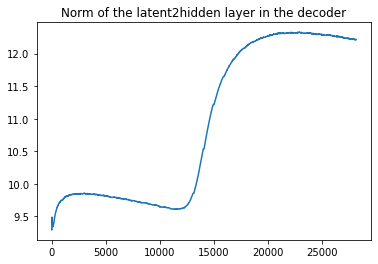

In [7]:
y=Gen.generator.model.decoder.norm
x=np.arange(len(y))

plt.plot(x,y)
plt.title("Norm of the latent2hidden layer in the decoder")
plt.show()